In [110]:
#1a
import pandas as pd
from scipy.stats import shapiro

sales_data = pd.read_csv('sales_data.csv')

s = sales_data['sales']

statistics, p_value = shapiro(s)

print(' Test statistic:', statistics)
print('p-value:', p_value)

if p_value > 0.05:
    print('The sales data is normally distributed')
else:
    print('The sales data is not normally distributed')

 Test statistic: 0.9603165984153748
p-value: 0.000261976063484326
The sales data is not normally distributed


In [118]:
#1b
store_A = df[df['store'] == 'A']['sales']  
store_B = df[df['store'] == 'B']['sales'] 

t_statistic, p_value = stats.ttest_ind(store_A, store_B)
print("T-statistic:", t_statistic)
print("P-value:", p_value)
if p_value < 0.05:
    print("There is a significant difference in sales between store A and B")
else:
    print("There is no significant difference in sales between store A and B")


T-statistic: 1.8278932603495361
P-value: 0.06957941060834068
There is no significant difference in sales between store A and B


In [121]:
#1c
clmns = ['price', 'promotion', 'sales', 'inventory', 'customer_reviews', 'profit']
correlation_matrix = data[clmns].corr()
print(correlation_matrix)


                     price  promotion     sales  inventory  customer_reviews  \
price             1.000000   0.038053  0.027275   0.025678         -0.145951   
promotion         0.038053   1.000000 -0.083977   0.100891          0.117205   
sales             0.027275  -0.083977  1.000000  -0.080141         -0.091605   
inventory         0.025678   0.100891 -0.080141   1.000000          0.091926   
customer_reviews -0.145951   0.117205 -0.091605   0.091926          1.000000   
profit            0.077067  -0.066937  0.049356   0.067996         -0.105505   

                    profit  
price             0.077067  
promotion        -0.066937  
sales             0.049356  
inventory         0.067996  
customer_reviews -0.105505  
profit            1.000000  


In [124]:
#1d
sales = df['sales'] 
reviews = df['customer_reviews']  
correlation_coefficient, p_value = stats.pearsonr(sales, reviews)
print("Correlation Coefficient value:", correlation_coefficient)
print("P value:", p_value)

if p_value < 0.05:
    print("There is a correlation between sales and customer_reviews.")
else:
    print("There is no correlation between sales and customer_reviews.")


Correlation Coefficient value: -0.09160484983254791
P value: 0.26489919814898805
There is no correlation between sales and customer_reviews.


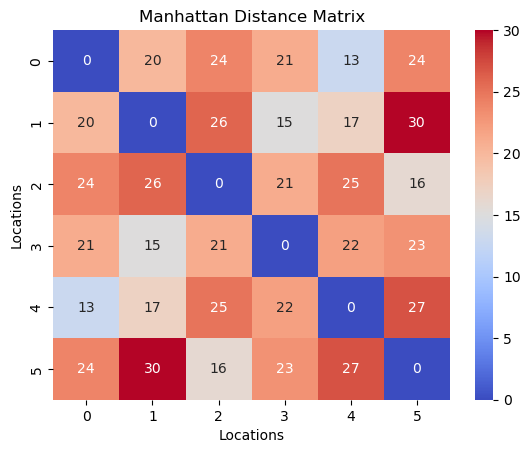

In [126]:
#PROBLEM2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
travel = np.array([[0, 5, 6, 8, 4, 7],
                   [5, 0, 9, 3, 5, 8],
                   [6, 9, 0, 5, 7, 5],
                   [8, 3, 5, 0, 6, 7],
                   [4, 5, 7, 6, 0, 9],
                   [7, 8, 5, 7, 9, 0]])
manhattan_dist = np.zeros((6, 6))
for i in range(6):
    for j in range(6):
        manhattan_dist[i, j] = abs(travel[i] - travel[j]).sum()
sns.heatmap(manhattan_distance, cmap='coolwarm', annot=True)
plt.xlabel('Locations')
plt.ylabel('Locations')
plt.title('Manhattan Distance Matrix')
plt.show()


In [130]:
# PROBLEM 3

import pandas as pd
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('sales_data.csv')
ind_variable = df[['price', 'promotion', 'sales', 'inventory', 'customer_reviews', 'profit']]
dep_variable = df['region']
logreg = LogisticRegression()
logreg.fit(ind_variable,dep_variable)
new_val = [[70, 0.5, 150, 25, 3, 8.0]]
pred_reg = logreg.predict(new_val)[0]
print('The anticipated region is based on the independent variables:', pred_reg)


The anticipated region is based on the independent variables: West


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RadiusNeighborsClassifier was fitted with feature names
  warnings.warn(


The estimated region based on the features provided is: South


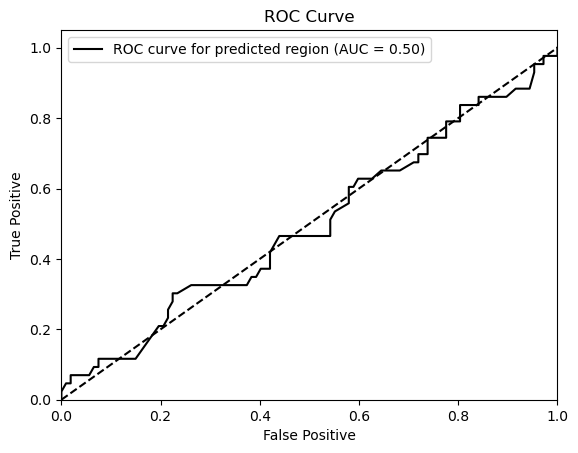

In [138]:
# PROBLEM 4
import pandas as pd
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
df = pd.read_csv('sales_data.csv')
ind_var = df[['price', 'promotion', 'sales', 'inventory', 'customer_reviews', 'profit']]
dep_var = df['region']
rnn = RadiusNeighborsClassifier(radius=radius)
rnn.fit(ind_var, dep_var)
given_features = [[80.33, 0.572, 300, 50, 3, 7.559]]
pred_reg = rnn.predict(given_features)[0]
print('The estimated region based on the features provided is:', pred_reg)
y_binary = (dep_var == pred_reg).astype(int)
fpr, tpr, thresholds = roc_curve(y_binary, rnn.predict_proba(ind_var)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='black', label='ROC curve for predicted region (AUC = {0:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend()
plt.show()
